In [25]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [1]:
!pip install pyspark

In [14]:
from pyspark.sql import SparkSession

In [15]:
SparkSession

pyspark.sql.session.SparkSession

In [17]:
spark = SparkSession.builder.getOrCreate()

In [18]:
spark

In [29]:
from pyspark.sql.functions import struct, desc, count, col, min, max
from matplotlib import pyplot as plt

In [44]:
listening_df =  spark\
                .read\
                .format("csv")\
                .option("header", "true")\
                .option("inferSchema", "true")\
                .load('/content/listenings.csv')

In [33]:
listening_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- date: long (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



In [35]:
listening_df.show(5)

+-----------+-------------+--------------------+---------+-----------------+
|    user_id|         date|               track|   artist|            album|
+-----------+-------------+--------------------+---------+-----------------+
|000Silenced|1299680100000|           Price Tag| Jessie J|      Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...| Jessie J|        Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|    Robyn|         Be Mine!|
|000Silenced|1299679200000|            Acapella|    Kelis|         Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|The Tease|I'm Not Invisible|
+-----------+-------------+--------------------+---------+-----------------+
only showing top 5 rows



In [47]:
listening_df = listening_df.drop('date')

In [37]:
listening_df.show(5)

+-----------+--------------------+---------+-----------------+
|    user_id|               track|   artist|            album|
+-----------+--------------------+---------+-----------------+
|000Silenced|           Price Tag| Jessie J|      Who You Are|
|000Silenced|Price Tag (Acoust...| Jessie J|        Price Tag|
|000Silenced|Be Mine! (Ballad ...|    Robyn|         Be Mine!|
|000Silenced|            Acapella|    Kelis|         Acapella|
|000Silenced|   I'm Not Invisible|The Tease|I'm Not Invisible|
+-----------+--------------------+---------+-----------------+
only showing top 5 rows



In [38]:
listening_df.count()

14650594

In [46]:
listening_df = listening_df.dropna()

In [40]:
listening_df.count()

13758905

In [41]:
shape = (listening_df.count(), len(listening_df.columns))
print(shape)

(13758905, 4)


In [42]:
listening_df.select('track','artist').show(10)

+--------------------+------------+
|               track|      artist|
+--------------------+------------+
|           Price Tag|    Jessie J|
|Price Tag (Acoust...|    Jessie J|
|Be Mine! (Ballad ...|       Robyn|
|            Acapella|       Kelis|
|   I'm Not Invisible|   The Tease|
|Bounce (Feat NORE...|    MSTRKRFT|
|Don't Stop The Mu...|     Rihanna|
|               ObZen|   Meshuggah|
|   Yama's Messengers|      Gojira|
|On the Brink of E...|Napalm Death|
+--------------------+------------+
only showing top 10 rows



In [52]:
# top 10 users who are fan of Rihanna -
R10 = listening_df.filter(listening_df.artist == 'Rihanna').groupby('user_id').agg(count('*').alias('count')).sort(desc('count'))
R10.show(10)

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        thiessu|  179|
|    eyessetkyle|  166|
|           adxx|  164|
|missnumberthree|  156|
|helloiamnatalie|  128|
|          nmjnb|  124|
|        AndyyyA|  123|
|     BIGBANG186|  121|
|     mixedvibes|  120|
|       AndyKitt|  115|
+---------------+-----+
only showing top 10 rows



In [54]:
# top 10 famous track
T10 = listening_df.groupby('artist','track').agg(count('*').alias('count')).sort(desc('count'))
T10.show(10)

+--------------+----------------+-----+
|        artist|           track|count|
+--------------+----------------+-----+
| Justin Bieber|           Sorry| 3381|
|Arctic Monkeys|Do I Wanna Know?| 2865|
|      Bon Iver|     Skinny Love| 2836|
|          Zayn|      PILLOWTALK| 2701|
|   The Killers|   Mr Brightside| 2690|
|       Rihanna|            Work| 2646|
|      Bastille|         Pompeii| 2606|
|Mumford & Sons| Little Lion Man| 2520|
|Mumford & Sons|        The Cave| 2485|
| Justin Bieber|   Love Yourself| 2481|
+--------------+----------------+-----+
only showing top 10 rows



In [55]:
#top10 famous tracks of rihanna
T10R = listening_df.filter(listening_df.artist == 'Rihanna').groupby('artist','track').agg(count('*').alias('count')).sort(desc('count'))
T10R.show(10)

+-------+--------------------+-----+
| artist|               track|count|
+-------+--------------------+-----+
|Rihanna|                Work| 2646|
|Rihanna|Only Girl (In the...| 1749|
|Rihanna|We Found Love (fe...| 1575|
|Rihanna|                 S&M| 1307|
|Rihanna|            Rude Boy| 1303|
|Rihanna|            Diamonds| 1224|
|Rihanna|      Kiss it Better|  945|
|Rihanna| Where Have You Been|  844|
|Rihanna|Cheers (Drink to ...|  697|
|Rihanna|           Needed Me|  679|
+-------+--------------------+-----+
only showing top 10 rows



In [57]:
#top10 famous albums
T10F = listening_df.groupBy('artist','album').agg(count('*').alias('count')).orderBy(desc('count'))
T10F.show(10)

+--------------------+--------------------+-----+
|              artist|               album|count|
+--------------------+--------------------+-----+
|          Kanye West|   The Life Of Pablo|22310|
|              The xx|                  xx|14195|
|      Arctic Monkeys|                  AM|14090|
|               alt-J|     An Awesome Wave|13635|
|      Mumford & Sons|        Sigh No More|13543|
|      Arctic Monkeys|Whatever People S...|12731|
|            Bon Iver|            For Emma|11994|
|              Grimes|          Art Angels|11655|
|Florence + the Ma...|               Lungs|11362|
|               Adele|                  21|11215|
+--------------------+--------------------+-----+
only showing top 10 rows



In [58]:
genre_df = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load('/content/genre.csv')

In [59]:
genre_df.printSchema()

root
 |-- artist: string (nullable = true)
 |-- genre: string (nullable = true)



In [60]:
genre_df.show()

+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
|        Otis Redding| soul|
|         Marvin Gaye| soul|
|     The Cranberries| rock|
|            Survivor| rock|
|       Fleetwood Mac|blues|
|           Radiohead| rock|
|                Toto| rock|
|                  U2| rock|
|Creedence Clearwa...| rock|
|                 REM| rock|
+--------------------+-----+
only showing top 20 rows



In [62]:
data = listening_df.join(genre_df, how = 'inner', on = ['artist'])
data.show()

+------------+-----------+--------------------+--------------------+--------------------+
|      artist|    user_id|               track|               album|               genre|
+------------+-----------+--------------------+--------------------+--------------------+
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Ariana Grande & ...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are|                 pop|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Ariana Grande & ...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag|                 pop|
|       Ro

In [65]:
#top 10 users fan of pop
data.select('user_id','genre').filter(genre =='pop').groupBy('user_id').agg(count('*').alias('count')).sort(desc('count')).show(10)

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        01Green|  496|
|      momousagi|  400|
|          mrpsb|  400|
|   BlueKnockOut|  378|
|    musicboy80s|  376|
|  incultojurgis|  374|
| ElektricOrchid|  370|
|foreign_fanatic|  350|
|   Kevin_Soutar|  346|
|  landrover2171|  301|
+---------------+-----+
only showing top 10 rows



In [66]:
#top10 famous genre
data.groupBy('genre').agg(count('*').alias('count')).sort(desc('count')).show(10)

+----------+-------+
|     genre|  count|
+----------+-------+
|      rock|2691934|
|       pop|1544747|
|electronic| 551509|
|   hip hop| 532984|
|      folk| 438174|
|indie rock| 431439|
|      punk| 380915|
|       r&b| 344101|
|     metal| 208107|
|     indie| 206726|
+----------+-------+
only showing top 10 rows



In [67]:
# each user fav genre
data.groupBy('user_id','genre').agg(count('*').alias('count')).sort(desc('count')).show()

+--------------+--------------------+-----+
|       user_id|               genre|count|
+--------------+--------------------+-----+
|     mrsands91|                 r&b|  952|
|     Benjiibop|                 r&b|  950|
|     sbrooks91|                 r&b|  915|
|       Pete557|                 r&b|  836|
|      _Seichi_|                 r&b|  765|
|     b00g13man| Associated Perfo...|  745|
|       Kaigamo|                 r&b|  741|
|   Kojobimpong|                jazz|  722|
| dejectedxcore|            synthpop|  665|
|   pussycatboi|                 r&b|  664|
|       Munross| Associated Perfo...|  645|
|     chazrules|                 r&b|  641|
|     LizzieJoe|                jazz|  640|
|lennyautomatik| Associated Perfo...|  625|
|   NaomiWaters|                 r&b|  620|
|   elizawright|                 r&b|  605|
|        jhnhtt| Associated Perfo...|  600|
|         oleuk|    Stephen Merchant|  600|
|    dragula100|                rock|  599|
|  WarrenPearce|                

In [79]:
bar = genre_df.select('genre').filter( (col('genre')=='pop') | (col('genre')=='rock') | (col('genre')=='electronic') | (col('genre')=='jazz'))\
.groupBy('genre').agg(count('*').alias('count'))

In [80]:
bar.show()

+----------+-----+
|     genre|count|
+----------+-----+
|       pop| 6960|
|electronic| 4410|
|      jazz| 4400|
|      rock| 9066|
+----------+-----+



In [84]:
data_bar = bar.collect()

In [96]:
row = [Row['genre'] for Row in data_bar]
count = [Row['count'] for Row in data_bar]

In [100]:
data_bar

[Row(genre='pop', count=6960),
 Row(genre='electronic', count=4410),
 Row(genre='jazz', count=4400),
 Row(genre='rock', count=9066)]

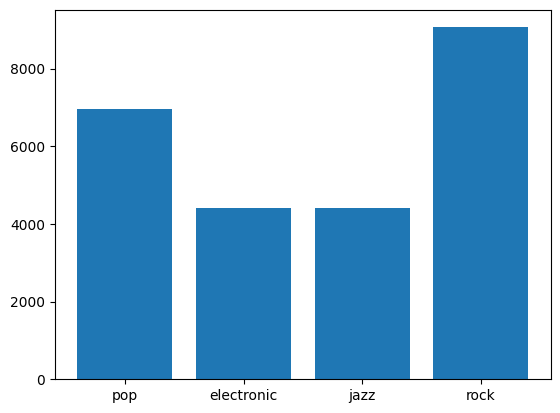

In [101]:
plt.bar(row, count)
plt.show()